# 🎓 Proyecto: Estadística para Data Science

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

### 0. Importaciones necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

sys.path.insert(0, str(Path("..").resolve()))

import src.transformaciones as tr
import src.visualizaciones as vs

# Configuración visual
sns.set_theme(style="whitegrid", palette="tab10")
# plt.style.use('seaborn-v0_8-whitegrid')

Funciones ejecutadas correctamente


### 1. Carga y vista general del dataset

El presente dataset es de construcción propia. Se ha creado en base a los datos extraídos de la encuesta [NHANES](https://wwwn.cdc.gov/nchs/nhanes/) desde los periodos 2007-2008 hasta 2021 - 2023.

Dichos datos proceden de cuestionarios referentes a diferentes ámbitos realizados a personas en Estados Unidos. Es por ello que para su construcción fueron necesarios datos sobre la Demografía, la Depresión, la Actividad física y el Sueño.

Cabe destacar que este tipo de encuestas tienen diferentes módulos, los cuales no se aplican a todas las personas, es decir, que existe la posibilidad que una persona que respondiese al cuestionario de depresión no lo haya hecho al de sueño y viceversa.

La unión y limpieza de estos datos se han hecho en el archivo ["limpieza_datos."](limpieza_datos.ipynb)

In [2]:
df = pd.read_csv('../data/nhanes_depression_dataset.csv')

In [3]:
df.head()

,id,perdida_interes,estado_animo,alteraciones_sueño,fatiga,cambios_apetito,sentimiento_inutilidad/culpa,dificultades_concentracion,inquietud/lentitud_motora,ideacion_suicida,...,edad,genero,etnia,educacion,estado_civil,indice_ingresos_familiares,horas_sueño,ciclo,min_actividad_diaria,PHQ9_score
0,41495,1,1,3,3,2,1,3,3,2,...,61,1,3,5.0,1.0,5.00,7.0,2007-2008,NaN,19.0
1,41528,1,2,3,3,3,3,2,2,2,...,63,1,5,2.0,3.0,NaN,4.0,2007-2008,NaN,21.0
2,41666,1,1,1,1,1,1,2,1,1,...,43,2,3,4.0,1.0,2.90,7.0,2007-2008,90.0,10.0
3,41731,2,3,1,3,3,2,2,1,2,...,46,2,1,3.0,5.0,0.51,4.0,2007-2008,15.0,19.0
4,41788,1,1,1,1,1,1,1,1,1,...,38,2,3,2.0,5.0,1.79,10.0,2007-2008,NaN,9.0


In [4]:
df.shape

(1529, 21)

A pesar de que en el archivo de limpieza se hubieran cambiado los tipos de datos, al cargar los datos de nuevo pandas reinfiere los tipos de las columnas en las que hay nulos. Esto hace necesario que se repita de nuevo el paso de conversión.

In [5]:
columnas = ['impacto_funcional_sintomas','educacion', 'estado_civil']
df = tr.cambiar_tipos(df,['ciclo'],columnas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            1529 non-null   int64   
 1   perdida_interes               1529 non-null   int64   
 2   estado_animo                  1529 non-null   int64   
 3   alteraciones_sueño            1529 non-null   int64   
 4   fatiga                        1529 non-null   int64   
 5   cambios_apetito               1529 non-null   int64   
 6   sentimiento_inutilidad/culpa  1529 non-null   int64   
 7   dificultades_concentracion    1529 non-null   int64   
 8   inquietud/lentitud_motora     1529 non-null   int64   
 9   ideacion_suicida              1529 non-null   int64   
 10  impacto_funcional_sintomas    1369 non-null   Int64   
 11  edad                          1529 non-null   int64   
 12  genero                        1529 non-null   in

Respecto al porcentaje de los valores perdidos, se han obtenido a partir de la función que calcula el número de nulos respecto al total de valores de cada variable.
Es importante recordar que estos nulos se deben a que NHANES utiliza submuestras a la hora de realizar los cuestionarios, es decir, no todos los módulos se aplican a los mismos encuentados, por lo que se tarda de una pérdida estructural.

De este modo, encontramos valores nulos en las siguientes columnas:
- impacto_funcional_sintomas: 10.46 %
- educacion: 6.28 %
- estado_civil: 6.41 %
- indice_ingresos_familiares: 11.9 %
- horas_sueño: 1.44 %
- min_actividad_diaria: 60.43 %

Estos datos nos indica que será necesario tomar las siguientes decisiones antes de modelar:
- Para la columna *horas_sueño* cuyo valor es inferior al 2%, se pueden eliminar las filas nulas ya que no afecta significativamente a los resultados.
- Para las columnas *impacto_funcional_sintomas*, *educacion*, *estado_civil* y *indice_ingresos_familiares*, cuyos valores oscilan entre 6% y el 12%, sería recomendable una imputación.
- Para la columna *min_actividad_diaria* al superar el 60% de valores nulos sería recomendable descartarla.

En cuanto a los valores duplicados no existen.

Adicionalmente, antes de crear los modelos será necesario normalizar las variables que se van a emplear ya que presentan escalas distintas, por ejemplo edad en años respecto al tiempo de actividad física en minutos o a las horas de sueño en horas.


In [6]:
cols_nulls = df.columns[df.isnull().any()]

tr.calculo_nulos(df,cols_nulls)

Porcentaje de nulos de impacto_funcional_sintomas = 10.46
Porcentaje de nulos de educacion = 6.28
Porcentaje de nulos de estado_civil = 6.41
Porcentaje de nulos de indice_ingresos_familiares = 11.9
Porcentaje de nulos de horas_sueño = 1.44
Porcentaje de nulos de min_actividad_diaria = 60.43


In [7]:
duplicados = df.duplicated().sum()
print(duplicados)

0


### 2. Clasificación de variables
Podemos clasificar las variables del dataset en:
- **Numéricas**
    - Continuas:
        - edad
        - indice_ingresos_familiares: su cálculo se debe a la siguiente fórmula para poder interpretarlo en función a cuatro categorías.

            PIR = ingresos del hogar/umbral de pobreza

            Categorías PIR:
            - Pobre	< 1.0
            - Casi pobre 1.0 – 1.99
            - Clase media 2.0 – 3.99
            - Clase alta ≥ 4.0
        - horas_sueño
        - min_actividad_diaria
        - PHQ9_score (target)

- **Cualitativas**
    - Nominales:
        - genero
            - 1 hombre
            - 2 mujer

        - etnia
            - 1 mexico
            - 2 otro hispano
            - 3 no hispano blanco
            - 4 no hispano negro
            - 5 otras razas incluidas multiraciales

        - estado_civil
            - 1 casado
            - 2 viudo
            - 3 divorciado
            - 4 separado
            - 5 nunca casado
            - 6 pareja de hecho

    - Ordinales:
        - educacion
            - 1 < grado 9
            - 2 grados 9-11
            - 3 graduado instituto
            - 4 universitario o grado aa
            - 5 graduado universitario o superior

        - impacto funcional sintomas
            - 0 nunca
            - 1 algunos días
            - 2 más de la mitad de los días
            - 3 prácticamente todos los días
            
        - ciclo
            - 2007 - 2008
            - 2009 - 2010
            - 2011 - 2012
            - 2013 - 2014
            - 2015 - 2016
            - 2017 - 2020
            - 2021 - 2023


- Las siguientes columnas son en origen **categóricas ordinales** ya que cada valor representa un grado respecto a la pregunta realizada pero se van a tratar como numéricas para el análisis descriptivo:

    - perdida_interes
    - estado_animo
    - alteraciones_sueño
    - fatiga
    - cambios_apetito 
    - sentimiento_inutilidad/culpa
    - dificultades_concentracion 
    - inquietud/lentitud_motora

La interpretación de sus datos es la siguiente:
- 0 nunca
- 1 algunos días
- 2 más de la mitad de los días
- 3 prácticamente todos los días


### 3. Estadísticos descriptivos

Gracias al describe podemos encontrar las siguientes conclusiones:

#### **Columnas PHQ_9:**
Todas las respuestas del test PHQ_9 se encuentran dentro de los rangos esperados (1 -3). Sus medianas suelen ser 2, a excepción de la *ideacion_suicida* que baja a 1. 
Respecto a sus varianzas rondan 0.70 a excepción de *inquietud/lentitud_motora*(0.63) e *ideacion_suicida*(0.51). A pesar de ello muestran una dispersión moderada.
Por último, existe una ligera tendencia hacia valores bajos en *ideacion_suicida* y en *inquietud/lentitud_motora* mientras que *fatiga* o *alteraciones_sueño* presentan sesgos hacia valores altos.

#### **Edad:**
La edad de los encuestados abarca desde los 18 hasta los 80 años, situando la mediana de los datos en 47 años, por lo que hay una alta variabiliadad. Presenta sesgo hacia los valores inferiores.

#### **Índice de ingresos familiares:**
Sus datos van desde 0.01 hasta 5 los cuales también eran de esperar. La mediana de ellos se sitúan en 1.31, por lo que la mitad de los encuestado perteneces al grupo "Casi pobre". Su variabilidad es de 1.89 lo que significa que es moderada.

#### **Horas de sueño:**
En cuanto a las horas de sueño pueden ir desde 1 hora hasta 14 horas, situando su mediana en 7 horas. Esto hace que la varianza sea alta. En cuanto al sesgo es practicamente insexistente ya que media y mediana convergen en 7.

#### **Minutos de actividad física:**
Este es el campo que mayor dispersión presenta ya que van desde 1 minuto hasta 8 horas. Presenta un sesgo positivo hacia valores más altos situadon la media en 91 y su mediana en 60 minutos.

#### **PHQ_score:**
Tenniendo en cuenta que esta columna se calcula en base a las preguntas del test PHQ_9, sus rangos entre 9 y 27 son los esperados. Tanto media como mediana se aproximan a los 17 puntos, por lo que apenas existe sesgo. Sin embargo, sí presenta una alta variabilidad lo que indica la existencia de heterogeneidad de los datos.


In [8]:
numeric_col = ['perdida_interes', 'estado_animo', 'alteraciones_sueño', 'fatiga',
       'cambios_apetito', 'sentimiento_inutilidad/culpa',
       'dificultades_concentracion', 'inquietud/lentitud_motora',
       'ideacion_suicida','edad', 'indice_ingresos_familiares', 'horas_sueño', 'min_actividad_diaria', 'PHQ9_score']

In [9]:
df[numeric_col].describe()

,perdida_interes,estado_animo,alteraciones_sueño,fatiga,cambios_apetito,sentimiento_inutilidad/culpa,dificultades_concentracion,inquietud/lentitud_motora,ideacion_suicida,edad,indice_ingresos_familiares,horas_sueño,min_actividad_diaria,PHQ9_score
count,1529.000000,1529.000000,1529.00000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1529.000000,1347.000000,1507.000000,605.000000,1529.000000
mean,1.890124,1.971223,2.16743,2.196861,1.914977,1.924133,1.914977,1.694572,1.669065,45.836494,1.761024,6.994360,91.350413,17.343362
std,0.847518,0.863276,0.85505,0.844502,0.844968,0.854308,0.845742,0.793612,0.711051,16.640154,1.373072,2.111233,84.288645,4.908904
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,0.010000,1.000000,1.000000,9.000000
25%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,0.750000,6.000000,30.000000,14.000000
50%,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,47.000000,1.310000,7.000000,60.000000,17.000000
75%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,59.000000,2.400000,8.000000,120.000000,21.000000
max,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,80.000000,5.000000,14.000000,480.000000,27.000000


In [10]:
# Cálculo Varianza:
for col in numeric_col:
    varianza = round(np.var(df[col], ddof=1),2)
    print(f'Varianza de {col} = {varianza}')

Varianza de perdida_interes = 0.72
Varianza de estado_animo = 0.75
Varianza de alteraciones_sueño = 0.73
Varianza de fatiga = 0.71
Varianza de cambios_apetito = 0.71
Varianza de sentimiento_inutilidad/culpa = 0.73
Varianza de dificultades_concentracion = 0.72
Varianza de inquietud/lentitud_motora = 0.63
Varianza de ideacion_suicida = 0.51
Varianza de edad = 276.89
Varianza de indice_ingresos_familiares = 1.89
Varianza de horas_sueño = 4.46
Varianza de min_actividad_diaria = 7104.58
Varianza de PHQ9_score = 24.1


In [11]:
# Cálculo Desviación Típica:
for col in numeric_col:
    desv = round(np.std(df[col], ddof=1),2)
    print(f'Desviación típica de {col} = {desv}')

Desviación típica de perdida_interes = 0.85
Desviación típica de estado_animo = 0.86
Desviación típica de alteraciones_sueño = 0.86
Desviación típica de fatiga = 0.84
Desviación típica de cambios_apetito = 0.84
Desviación típica de sentimiento_inutilidad/culpa = 0.85
Desviación típica de dificultades_concentracion = 0.85
Desviación típica de inquietud/lentitud_motora = 0.79
Desviación típica de ideacion_suicida = 0.71
Desviación típica de edad = 16.64
Desviación típica de indice_ingresos_familiares = 1.37
Desviación típica de horas_sueño = 2.11
Desviación típica de min_actividad_diaria = 84.29
Desviación típica de PHQ9_score = 4.91


Para un mayor análisis se ha optado por analizar esas mismas columnas en función del género. Es por ello que se han obtenido las desviaciones típicas y sus medianas. De este modo obtenemos las siguientes conclusiones:

#### **Columnas PHQ_9:**
Generalmente hombres y mujeres presentan valores similares respecto a sus desviaciones y medias. sin embargo, se observa que las columnas *fatiga* y *alteraciones_sueño* son ligeramente superiores para las mujeres mientras que *perdida_interes* e *inquietud/lentitud_motora* son mayores para los hombres. El resto de columnas presentan valores más homogéneos, por lo que en general ambos tienen patrones similares en cuanto a los síntomas de depresión.

#### **Edad:**
La edad de las mujeres es ligeramente inferior a la de los hombres. Además, la dispersión es mayor en el segundo grupo lo que indica que la muestra masculina es más diversa en cuanto a la edad.

#### **Índice de ingresos familiares:**
Los hombres presentan ingresos en promedio más altos, es decir, sus ingresos son mayores a los de las mujeres. A pesar de ello, la dispersión es similar para ambos géneros (aproximadamente 1.37). Esto indica que a pesar de la diferencia de ingresos entre ambos géneros, su heterogeneidad es similar.

#### **Horas de sueño:**
La media es muy similar para hombres y mujeres situándose aproximadamente en las 7 horas para ambos grupos. La dispersión de las mujeres es superior(2.15 vs 2.05), lo que indica que a pesar de que el patrón de sueño sea similar en ambos grupos, el de mujeres puede presentar outliers en ambos extremos.

#### **Minutos de actividad física:**
En este caso la diferencia es significativa ya que los hombre realizan de media 100.4 minutos mientras que las mujeres 87.5, lo que indica que los hombres son más activos. En cuanto a la dispersión, tambien es mayor en hombres, los cuales presentan una desviación alta (88.7). El grupo de mujeres también presenta una dispersión alta (81), por lo que ambos grupos presentan sesgos positivos y alta heterogeneidad.

#### **PHQ_score:**
Ambos grupos presentan valores similares tanto en media como en desviación típica, aunque para hombres los valores de esta segunda métrica son ligeramente mayores(5.03 vs 4.84), lo que indica que tienen una dispersión moderada ligeramente más alta que las mujeres.

In [12]:
for col in numeric_col:
    medias_pares = df.groupby(['genero'])[col].mean()
    varianza_pares = df.groupby(['genero'])[col].std()
    print('-----------------------------------------')
    print(f'Media de {col} en función del género:')
    print(f'{medias_pares}\n')
    print(f'Desviación de {col} en función del género:')
    print(f'{varianza_pares}\n')

-----------------------------------------
Media de perdida_interes en función del género:
genero
1    1.943636
2    1.860061
Name: perdida_interes, dtype: float64

Desviación de perdida_interes en función del género:
genero
1    0.848499
2    0.845914
Name: perdida_interes, dtype: float64

-----------------------------------------
Media de estado_animo en función del género:
genero
1    1.985455
2    1.963228
Name: estado_animo, dtype: float64

Desviación de estado_animo en función del género:
genero
1    0.851318
2    0.870251
Name: estado_animo, dtype: float64

-----------------------------------------
Media de alteraciones_sueño en función del género:
genero
1    2.141818
2    2.181818
Name: alteraciones_sueño, dtype: float64

Desviación de alteraciones_sueño en función del género:
genero
1    0.863063
2    0.850620
Name: alteraciones_sueño, dtype: float64

-----------------------------------------
Media de fatiga en función del género:
genero
1    2.116364
2    2.242084
Name: fatig

### 4. Detección de outliers

Para la detección de outliers se han escogido las columnas que son estrictamente numéricas, es decir, aquellas que lo han sido en el origen. 

Para ello se ha empleado la función detección_outliers que consiste en calcular los índices intercuartílicos. De este modo, cualquier dato inferior a **Q1 - 1.5 * IQR** o superior a  **Q3 - 1.5 * IQR** se considerarán outliers.

Gracias a ello, se observa que las columnas que presentan outliers son:
- *indice_ingresos_familiares*: presenta outliers en el límite superior a partir del índice 4.875, lo que indica que algunos individuos reportan ingresos mucho más altos que la mayoría de la muestra.

- *horas_sueño*: se detectan valores atípicos tanto por debajo de 3 horas diarias como por encima de 11 horas diarias, señalando casos extremos de privación de sueño o descanso excesivo.

- min_actividad_diaria: existen valores atípicos para valores superiores a 255 minutos, es decir 4,25 horas, refeljando individuos con niveles muy altos de actividad física.

**Impacto potencial**
Los outliers identificados pueden afectar los análisis estadísticos y los modelos predictivos ya que pueden sesgar la media, haciendo que no represente adecuadamente el centro de los datos e inflando la desviación estándar, lo que hace que parezca que hay mayor dispersión.

Dentro de los modelos de regresión lineal, los valores extremos pueden influir en los coeficientes y predicciones afectando la interpretación de la relación entre variables, por lo que tambén estaría afectando las correlaciones.

Por todo ello, sería recomendable aplicar transformaciones como por ejemplo las logaritmicas o escalados para tener datos más robustos.

In [13]:
# Selección de columnas numéricas en origen:
cols = ['edad',
 'indice_ingresos_familiares',
 'horas_sueño',
 'min_actividad_diaria',
 'PHQ9_score']

In [14]:
tr.deteccion_outliers(df, cols)

edad no presenta outliers
-------------------------------------------
Outlier superior de indice_ingresos_familiares por encima de 4.875
-------------------------------------------
Outlier inferior de horas_sueño por debajo de 3.0
Outlier superior de horas_sueño por encima de 11.0
-------------------------------------------
Outlier superior de min_actividad_diaria por encima de 255.0
-------------------------------------------
PHQ9_score no presenta outliers
-------------------------------------------


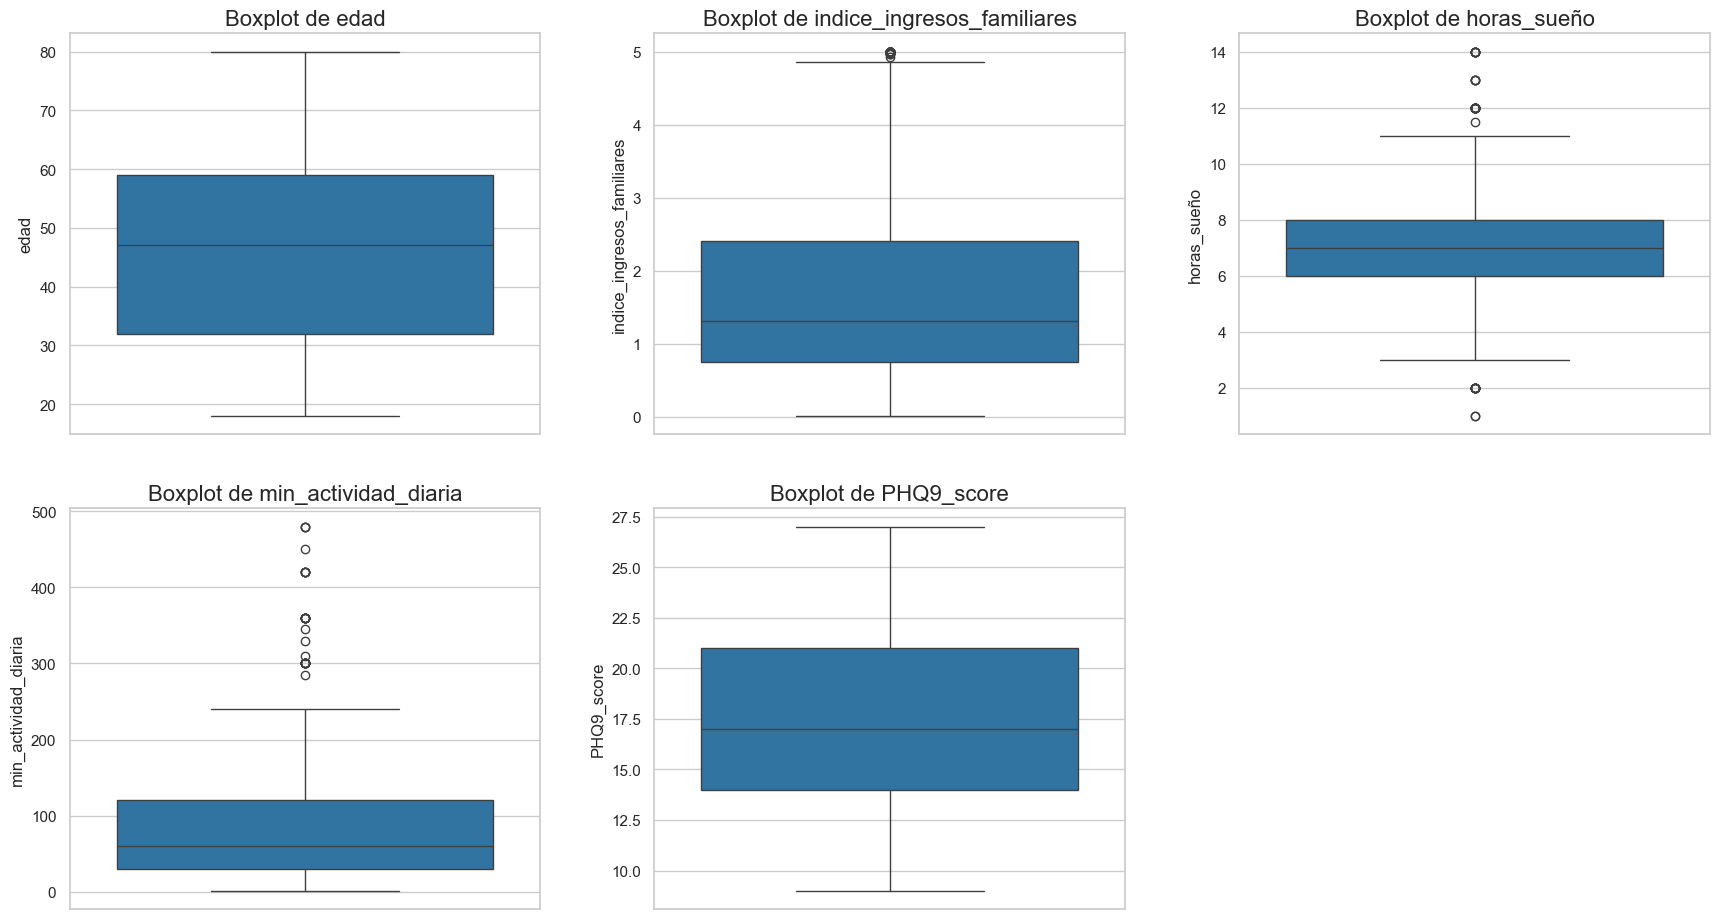

In [15]:
vs.boxplot_uni(df,cols, 3)

Adicionalmente, se han realizado boxplot de las mismas columnas en función del género para observar la existencia de valores atípicos en ambos grupos.

En este caso destaca:
- *indice_ingresos_familiares*: las mujeres presentan outliers en el rango superior, a partir de 4.5, indicando que es poco frecuente los ingresos muy altos en este grupo tal y como se predecía en el análisis del apartado anterior. 

- *horas_sueño*: en este caso diferenciamos que los hombres muestran valores más concentrados a pesar de que existen valores atípicos tanto inferiores como superiores. Sin embargo, estos datos existen por debajo de 3 y por encima de 11 horas. El grupo de las mujeres tiene un abanico de valores más amplio, a pesar de que la mediana se sitúa en el mismo valor(aproximadamente 7 horas). Sus valores atípicos presentan valores extremos por debajo de 1 y por encima de 11,5 indicando mayor variabilidad y presencia de casos extremos.

- *min_actividad_diaria*: destaca que tanto hombre como mujeres situan la mediana en 60-70 minutos diarios. Sin embargo, destaca que para las mujeres los outliers se sitúan a partir de un valor superior a los de los hombres, lo que refleja que existen mujeres con niveles de actividad extremadamente altos.

En conclusión, este análisis confirma que los outliers existen para ambos grupos pero que se diferencian en los rangos extremos. Las mujeres tienden a mostrar mayor dispersión en horas de sueño o de actividad física, mientras que los hombres tienen outliers menos extremos, lo que hace que influyan en la media y la  dispersión al comparar ambos géneros.

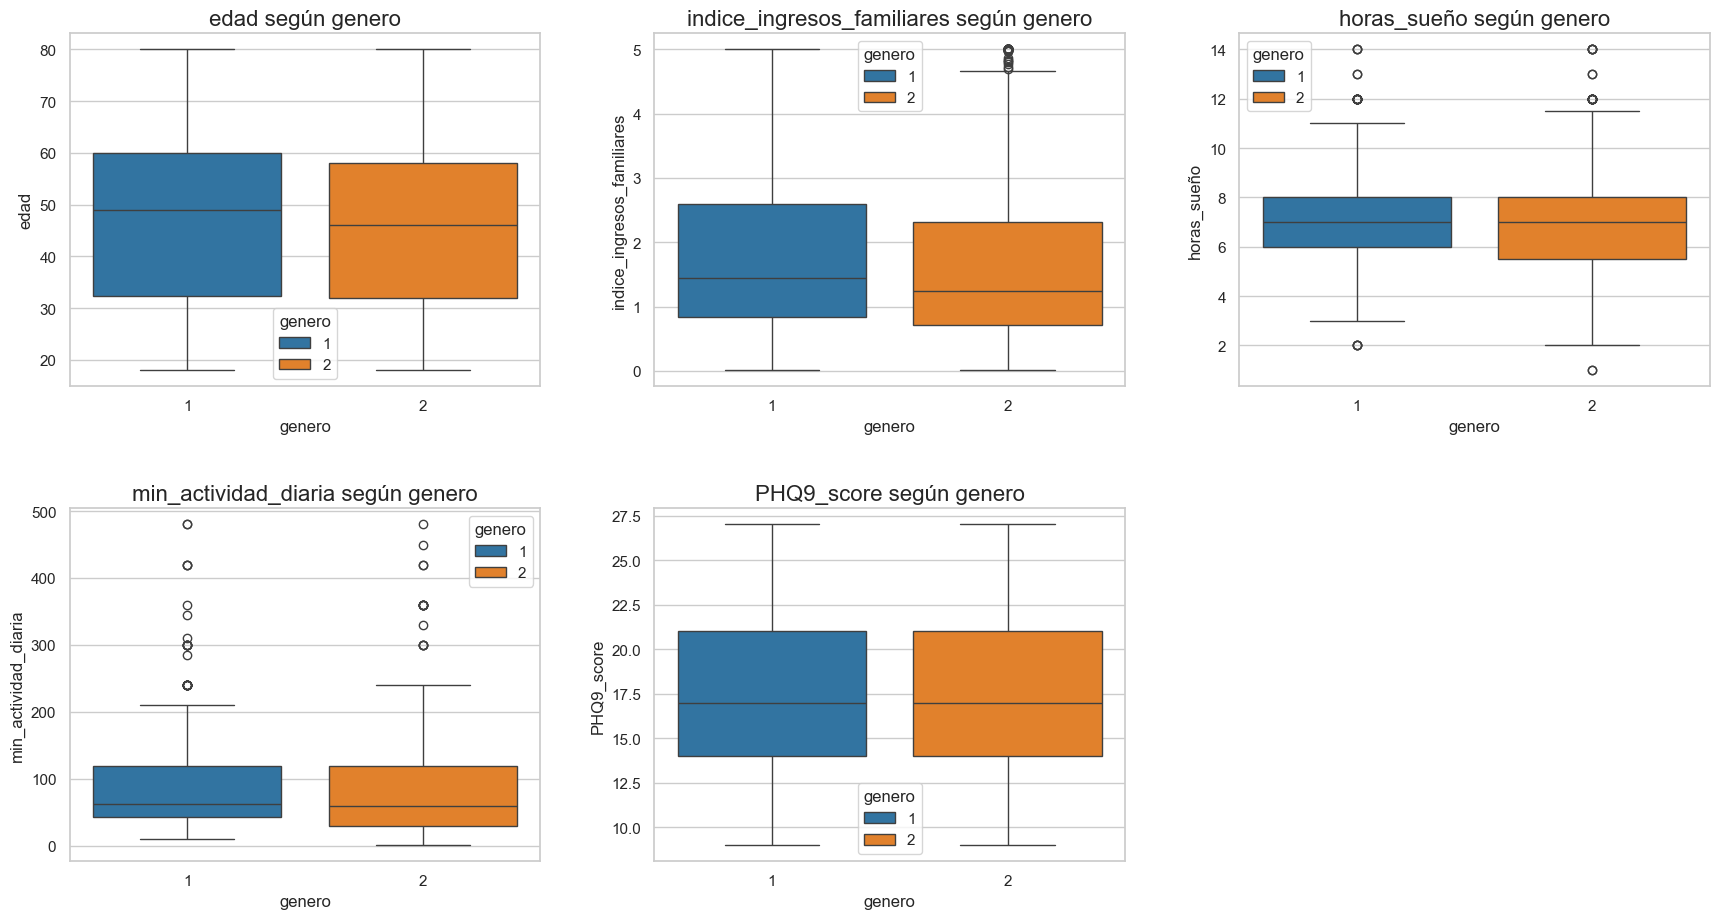

In [16]:
vs.boxplot_bivariante(df,'genero',cols, cols = 3)

### 5. Visualización de histogramas

Para el análisis de la asimetría de las variables numéricas obtenemos las siguientes conclusiones que serán apoyadas posteriormente con la visualización de sus respectivos histogramas:
- *edad* es prácticamente simétrica ya que el valor obtenido es aproximadamente 0. En el histrograma se observa como se desplaza ligeramnete hacia la derecha, reflejando la existencia de las edades más avanzadas de la muestra. La curtosis es negativa, lo qu eindica que sus colas son menos pronunciadas.

- *indice_ingresos_familiares* presenta asimetría hacia la derecha. Esto se debe, tal y como se ve en el histograma a la existencia de outliers para valores superiores a 4.875 como se ha visto con anterioridad. Su ligera curtosis positiva indica que las colas son más pesadas que las de una distribución normal pero no de una manera significativa.

- *horas_sueño* presenta una ligera simetría positiva, pero sigue aproximadamente una distribución similar a la normal con la mayoría de los datos centrados en la mediana (7 horas).

- *min_actividad_diaria* tiene una fuerte asimetría positiva reflejada en el histograma como una larga cola a la derecha ya que la mayoría de los datos se concentra entre 0 y 120 minutos. Al obtener una curtosis de 4.75 nos indica que presenta colas pesadas reforzando la existencia de valores extremos.

- *PHQ9_score* su asimetría a la derecha es muy pequeña, casi imperceptible a simple vista, indicando que la puntuación total de los participantes está relativamente equilibrada. La curtosis negativa(-0.86) indica que la distribución es ligeramente más plana que la normal, con colas más suaves y menos concentración en el centro.

In [17]:
for col in cols:
    asimetría = round(df[col].skew(),2)
    print(f'Coeficiente de asimetría de {col} = {asimetría}')

Coeficiente de asimetría de edad = 0.02
Coeficiente de asimetría de indice_ingresos_familiares = 1.1
Coeficiente de asimetría de horas_sueño = 0.28
Coeficiente de asimetría de min_actividad_diaria = 2.06
Coeficiente de asimetría de PHQ9_score = 0.11


In [18]:
for col in cols:
    curtosis = round(df[col].kurt(),2)
    print(f'Coeficiente de curtosis de {col} = {curtosis}')

Coeficiente de curtosis de edad = -0.94
Coeficiente de curtosis de indice_ingresos_familiares = 0.21
Coeficiente de curtosis de horas_sueño = 0.24
Coeficiente de curtosis de min_actividad_diaria = 4.75
Coeficiente de curtosis de PHQ9_score = -0.86


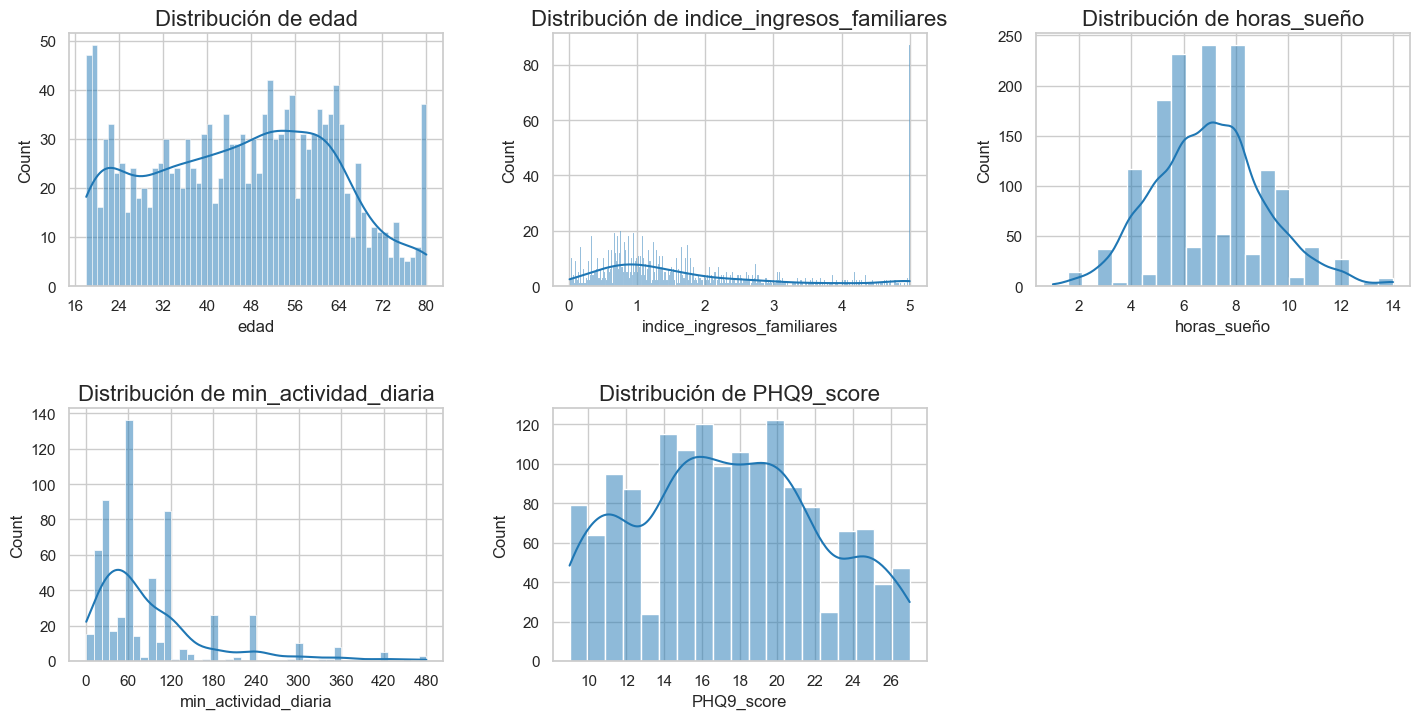

In [19]:
vs.pintar_distrib_num_uni(df,cols, 3)

#### **Conclusión**
--------------------
El análisis descriptivo indica que, en general, los datos presentan una calidad aceptable para modelar, con ciertas consideraciones.

La presencia de valores nulos varía según la variable, ya que según el porcentaje obtenido se podrán eliminar, imputar o descartar la columna.

En cuanto a la detección de outliers, hay que tener en cuenta que pueden estar sesgando los datos, inflando la dispersión y pueden afectar a las correlaciones y predicciones de los modelos de regresión, por lo que sería necesario aplicar transformaciones o modelos robustos.

Por último, debido a la diferencia de escalas enre las variables, se necesitará normalizar o estandarizar antes de modelar.


## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

### 0. Importaciones necesarias

In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

### 1. Análisis de correlaión

Para el análisis de la correlación se ha decidido mantener las variables pertenecientes a las preguntas del PHQ9.

Como era de esperar, los resultados de estas variables están fuertemente relacionadas con el objetivo tal y como reflejan sus coeficientes de Pearson que no bajan de 0.61. Esto se debe a que tal y como se indicó en el archivo (limpieza de datos)[limpieza_datos_v3], el target se obtuvo sumando los valores indicados en las preguntas del test.

Por otro lado, destaca un fuerte correlación entre las preguntas *estado_animo* con *perdida_intereses* (0.55) y *estado_animo* con *sentimiento_inutilidad/culpa* (0.51). Esto significa que cuanto peor estado de ánimo tiene una persona(valor 3), mayor pérdida de interés padece y videversa. Del mismo modo sucede con el estado de ánimo y el sentimiendo de inutilidad o culpa.

En cuanto a variables externas, existe una ligera correlación positiva entre el target y la edad sugiriendo que a mayor edad, PHQ9_score tiende a ser mayor. También existen pequeñas correlaciones negativas entre el target y el índice de ingresos familiares, las horas de sueño y los minutos de actividad diaria, por lo que a más ingresos, más horas de sueño o más minutos de actividad, menor puntuación obtendrán.

Finalmente, es importante destacar que la variable *edad* presenta una moderada correlación negativa con los minutos de actividad diaria. Además, como con Speraman se consiguen coeficientes menores que con Pearson, la correlación entre ambas variables no será lineal.

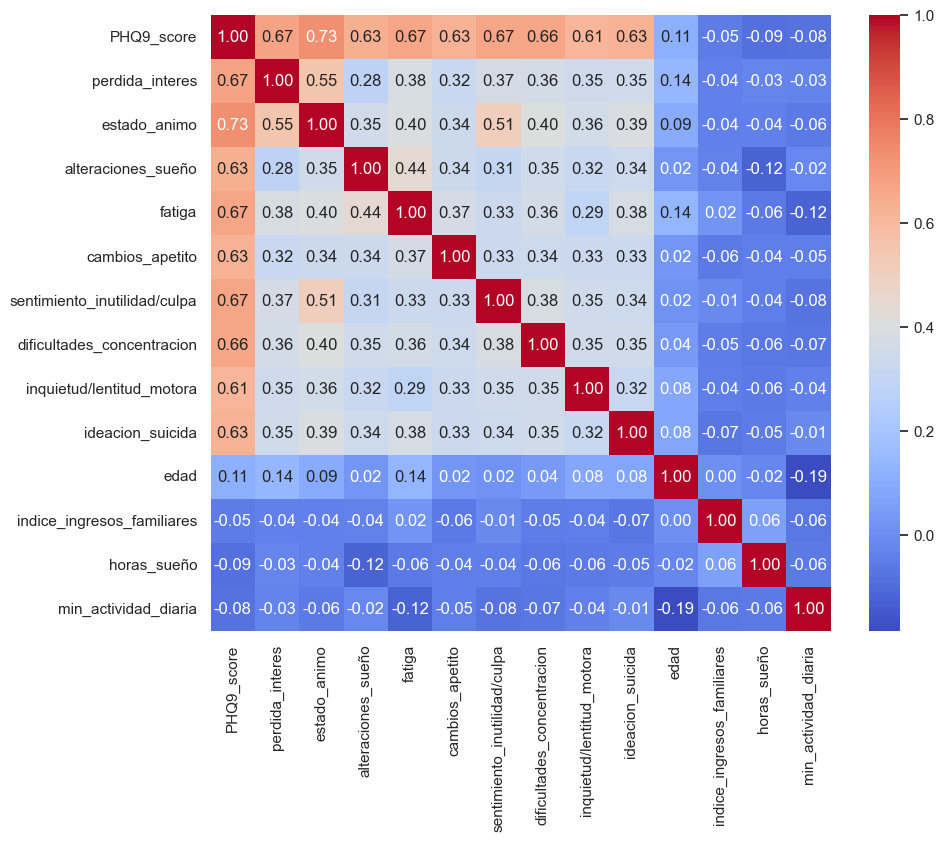

In [21]:
target = 'PHQ9_score'
numeric_col.remove(target)

columnas = [target] + numeric_col
# Correlación de Pearson
matriz_corr = df[columnas].corr()

plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

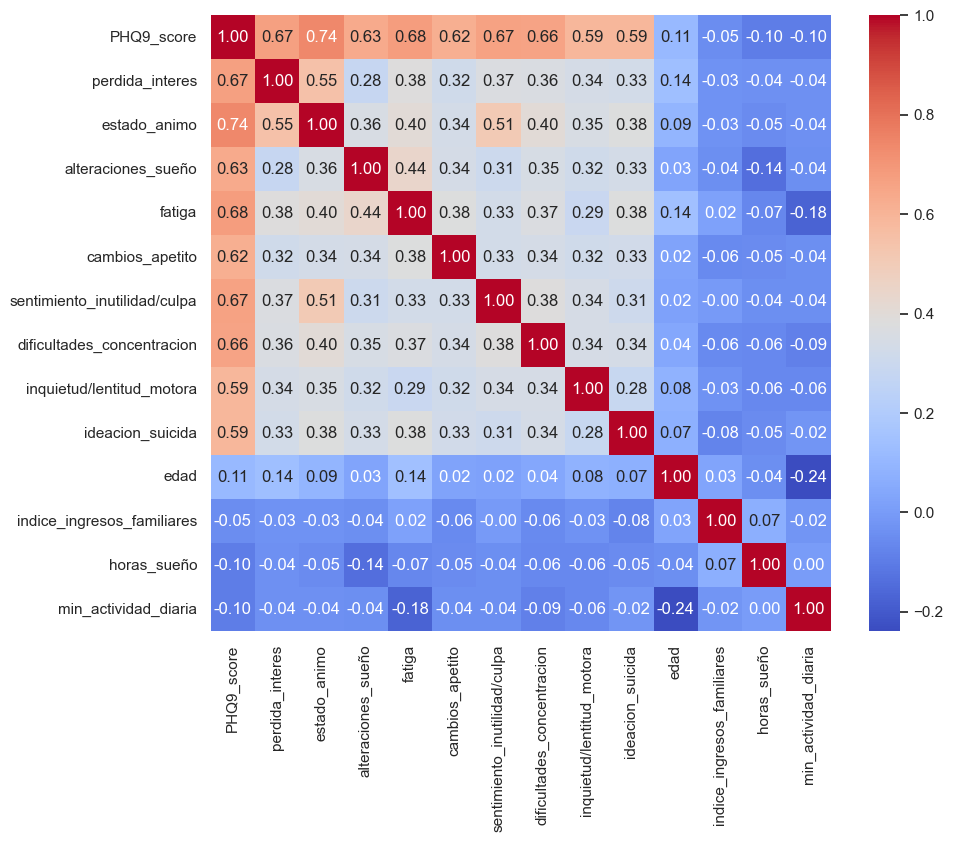

In [22]:
# Correlacion de Spearman
matriz_corr_spearman = df[columnas].corr(method='spearman')

plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr_spearman, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### 2. Relaciones bivariantes

En el caso del análisis bivariante, se ha considerado usar solo las columnas numéricas, excluyendo las preguntas del test que eran categóricas. Esta decisión se tomó para mejorar la visualización de los datos y porque no aportaban información relevante.

Adicionalmente, se ha utilizado la variable *genero* para diferenciar cómo se distribuyen las variables en función de estos grupos.

Tal y como se esperaba tras analizar la matriz de correlación, no se observan correlaciones lineales fuertes. Sin embargo, se puede apreciar una ligera relación negativa entre la edad respecto y los minutos de actividad diaria, a pesar de que la mayoría de los valores se concentran en los valores bajos.

De forma similar sucede con el indice de ingresos familiares con las horas de sueño o con las horas de sueño y los minutos de actividad diaria pero con pendientes más suaves, confirmando las tendencias observadas en el previo análisis de correlación.

Este comportamiento también se aprecia para los minutos de actividad diaria con el *PHQ9_score*.

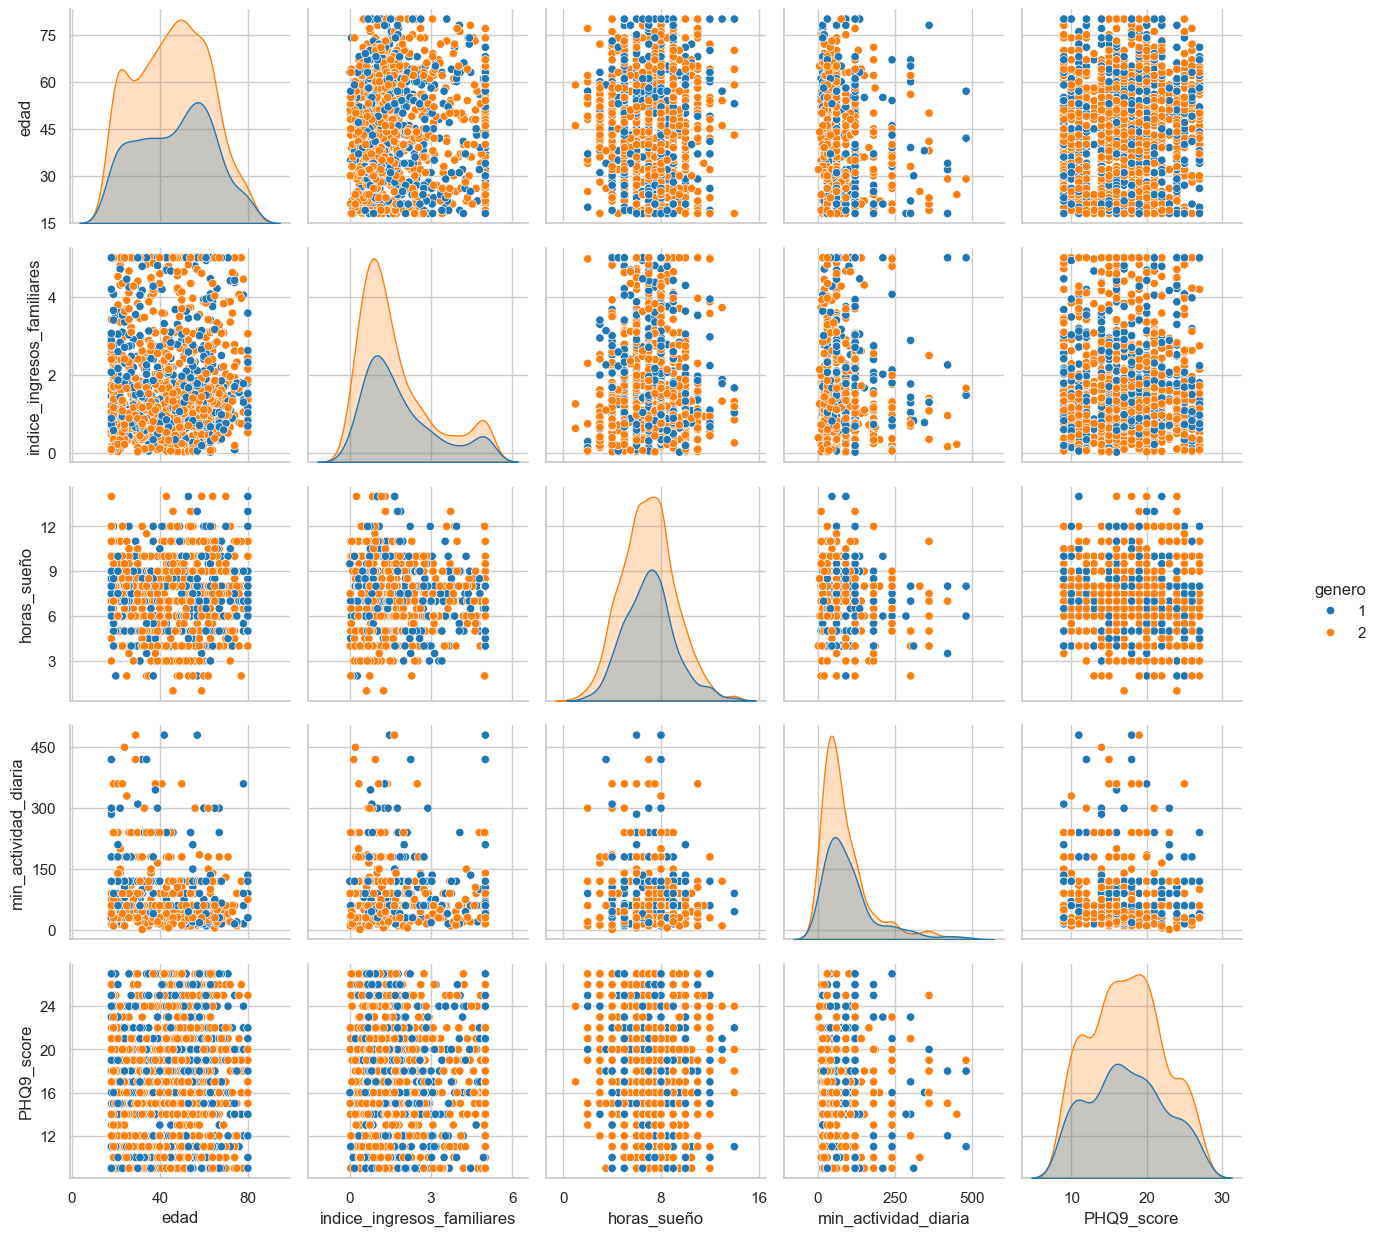

In [23]:
vs.dibujar_pairplot(df,'genero',cols)

### 3. Regresión lineal

Para la regresión lineal se han descartado en primer lugar todas las columnas del test que están directamente correlacionadas con el target para evitar cometer *data leakage* ya que el valor total se obtiene sumando los valores obtenidos en dichas preguntas.

Para reforzar este planteamiento se ha creado un modelo de regresión lineal simple con la variable *estado_animo* que presenta la mayor correlacion con el target y se han calculado MSE, RMSE y R2.

Al tener un R2 de 0.55, podemos concluir esta variable por sí sola es capaz de explicar el 55% de  variabilidad del *PHQ9_score*. Por otro lado, su RMSE es de 3.42, lo que significa que las predicciones en promedio se desvían en 3.42 unidades respecto al valor real. Para este dataset que abarca valores de 0 a 27 se trataría de un error acepable. 

sin emabrgo, su uso directo no permitiría construir un modelo confiable ni generalizable, por lo que para la construcción de modelos más robustos será necesario seleccionar variables independientes del target para evitar que ocurra sesgo o sobreajuste.

In [24]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)
x_train = train[['estado_animo']]
y_train = train['PHQ9_score']

X_test = test[['estado_animo']]
Y_test = test['PHQ9_score']

reg_lineal = LinearRegression()
reg_lineal.fit(x_train,y_train)
y_pred = reg_lineal.predict(X_test)

score = reg_lineal.score(X_test,Y_test)
mse_uni = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = mse_uni**(1/2)


print(round(score,2))
print(f'MSE = {round(mse_uni,2)}')
print(f'RMSE = {round(rmse,2)}')
print(f'R2 = {round(r2,2)}')


0.55
MSE = 11.69
RMSE = 3.42
R2 = 0.55


<Axes: xlabel='estado_animo', ylabel='PHQ9_score'>

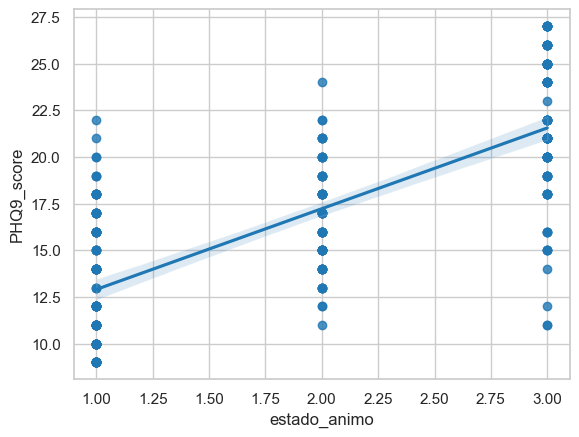

In [25]:
sns.regplot(x='estado_animo', y='PHQ9_score', data = test)

Debido a lo comentado con anterioridad, se ha optado por elegir lar siguientes variables numéricas que tenían correlación con el target:
- edad
- indice_ingresos_familiares
- horas_sueño

A pesar de que los minutos de actividad diaria tenían valores similares a las variables anteriores, al tener más del 60% de nulos no se tiene en cuenta para realizar la regresión ya que si los eliminamos perderíamos mucha información y si los imputásemos estaríamos sesgando el modelo.

Adicionalmente, también se han elegido las siguientes columnas categóricas/cualitativas:
- impacto_funcional_sintomas
- genero
- educacion

Aunque el impacto_funcional_sintomas forma parte del test PHQ_9 no se emplea para la obtener el target sino que se trata de una interpretación subjetiva de los síntomas que pueden padecer los encuestados.

Tanto el estado_civil como la etnia se descartan ya que en pruebas anteriores se obtuvo un peor modelo, lo que significa que añadían ruido o sobreajuste.

Para la realización del modelado se ha procedido a eliminar los nulos y la columna género se ha pasado a dummy para la correcta realización de la regresión.

In [28]:
var_reg= ['impacto_funcional_sintomas', 'edad', 'genero',
       'educacion', 'indice_ingresos_familiares',
       'horas_sueño','PHQ9_score']

df_sin_nulos = df[var_reg].dropna()

df_dummies = pd.get_dummies(df_sin_nulos['genero'], drop_first=True)
df_regresion= pd.concat([df_sin_nulos,df_dummies], axis = 1)
df_regresion.drop('genero', axis = 1, inplace = True)

In [29]:
train, test = train_test_split(df_regresion, test_size = 0.2, random_state=42)
x_train = train.drop('PHQ9_score', axis = 1)
x_train.columns = x_train.columns.astype(str)
y_train= train[['PHQ9_score']]

X_test= test.drop('PHQ9_score', axis = 1)
X_test.columns = X_test.columns.astype(str)
Y_test= test[['PHQ9_score']]

reg_lineal_muliple = LinearRegression().fit(x_train,y_train)
y_pred= reg_lineal_muliple.predict(X_test)

score = reg_lineal_muliple.score(X_test,Y_test)
mse = mean_squared_error(Y_test,y_pred)
rmse = mse**(1/2)
r2 = r2_score(Y_test,y_pred)

print(round(score, 2))
print(f'MSE = {round(mse,2)}')
print(f'RMSE = {round(rmse,2)}')
print(f'R2 = {round(r2,2)}')

0.26
MSE = 18.9
RMSE = 4.35
R2 = 0.26


In [30]:
model = LinearRegression()
r2_score_cv = cross_val_score(model, X_test,Y_test, cv = 5, scoring = 'r2')

print(r2_score)
print(np.mean(r2_score_cv))

<function r2_score at 0x000002E077D274C0>
0.19064229703669583


In [31]:
rmse_score = cross_val_score(model, X_test,Y_test, cv = 5, scoring = 'neg_mean_squared_error')
mse_scores = np.sqrt(-rmse_score)

print(mse_scores)
print(np.mean(mse_scores))

[4.83328936 4.06137613 4.99076165 4.07058903 4.50162748]
4.491528730045888


Al tratar de mejorar el modelo con validación cruzada, se observa que el modelo explica menos varianza ya que pasa de 0.26 a 0.19 y que se cometen más errores( 4.35 a 4.49). Sin embargo, estos datos son más realistas ya que la validación cruzada obliga al modelo a aprender patrones y a aplicarlos correctamente a diferentes subconjuntos de datos, lo que proporciona una evaluación más robusta y disminuye el riesgo de sobreajuste. 

Tras la realización del modelo lineal se han obtenido los residuos, los cuales presentan una distribución normal y centrada aproximadamente en 0 en ambos casos, lo que significa que los errores se distribuyen de forma simétrica alrededor de este punto.

Sin embargo, el modelo que presenta validación cruzada tiene una distribución más uniforme y suave, lo que corrobora que sea un modelo más robusto y generalizable.

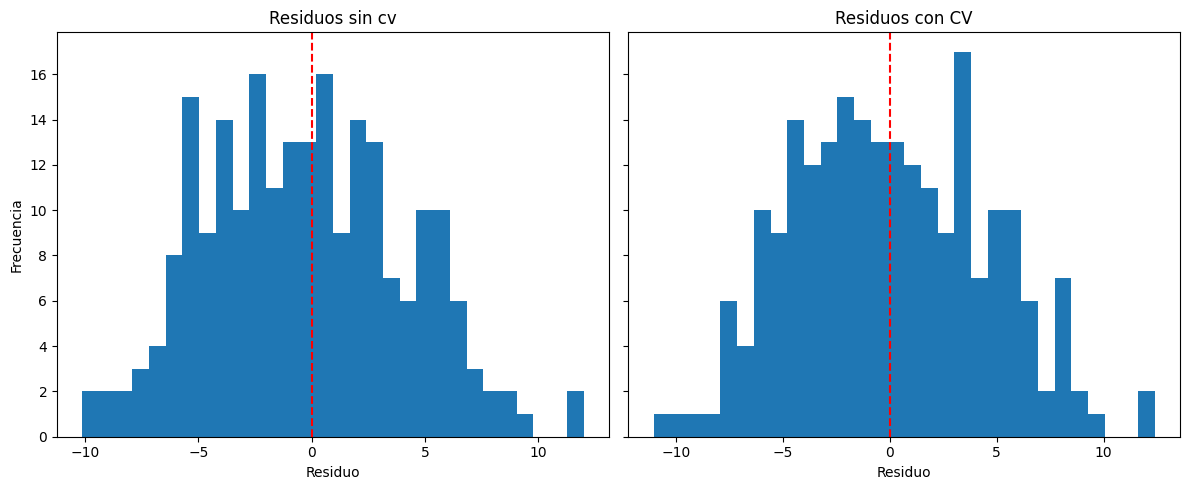

In [32]:
from sklearn.model_selection import cross_val_predict
# Residuos sin cv
residuos = Y_test- y_pred
y_pred_cv = cross_val_predict(model, X_test, Y_test, cv=5)

# Residuos cv
residuos_cv = Y_test - y_pred_cv

fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Histograma sin CV
axes[0].hist(residuos, bins=30)
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('Residuos sin cv')
axes[0].set_xlabel('Residuo')
axes[0].set_ylabel('Frecuencia')


# Histograma con CV
axes[1].hist(residuos_cv, bins=30)
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Residuos con CV')
axes[1].set_xlabel('Residuo')

plt.tight_layout()
plt.show()

En cuanto a la dispersión de ambos casos no sigue ningún patrón definido, por lo que la relación entre las variables y el target es débil. Además su dispersión es bastante uniforme a lo largo del eje horizontal, lo que descarta la existencia de heterocedasticidad, es decir, el modelo comete errores similares independientemente de si son puntuaciones altas o bajas.

Text(0.5, 1.0, 'Dispersión de residuos con cv')

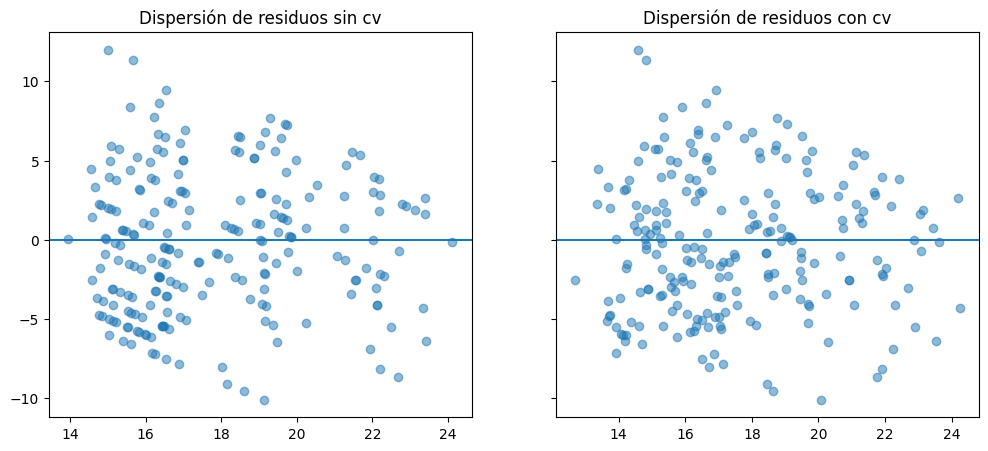

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

axes[0].scatter(y_pred, residuos, alpha=0.5)
axes[0].axhline(0)
axes[0].set_title('Dispersión de residuos sin cv')

axes[1].scatter(y_pred_cv, residuos, alpha=0.5)
axes[1].axhline(0)
axes[1].set_title('Dispersión de residuos con cv')

### 4. Regresión logística

A la hora de realizar un modelo con regresión logística es importante destacar que dichos modelos se emplean para predecir variables categóricas/cualitativas. Como nos encontramos ante un target numérico será necesario realizar esta transformación a la variable objetivo. Por ello, se ha tomado como valor de corte los 10 puntos. Para personas que hayan obtenido 10 o más puntos se considerará que tienen depresión.

Tras ello, como el target estaba muy desbalanceado, fue necesario incluir el parámetro *class_weight='balanced'* en la regresión.

Por otro lado, las métricas utilizadas para la regresión logística son diferentes ya que no podremos usar R2 o RMSE como en regresión lineal. Sin embargo han sido introducidas para compararlas con los resultados obtenidos en la regresión lineal.

In [34]:
# Pasamos a binario el target
df_regresion['depresion'] = (df_regresion['PHQ9_score'] >= 10).astype(int)

In [35]:
df_regresion['depresion'].value_counts(normalize = True)

depresion
1    0.953321
0    0.046679
Name: proportion, dtype: float64

In [36]:
train, test = train_test_split(df_regresion, test_size = 0.2, random_state=42, stratify = df_regresion['depresion'])
x_train = train.drop(['PHQ9_score','depresion'], axis = 1)
x_train.columns = x_train.columns.astype(str)
y_train= train['depresion']

X_test= test.drop(['PHQ9_score','depresion'], axis = 1)
X_test.columns = X_test.columns.astype(str)
Y_test= test['depresion']

clf = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced').fit(x_train,y_train)
y_pred = clf.predict(X_test)

mse = mean_squared_error(Y_test,y_pred)
rmse = mse**(1/2)
r2 = r2_score(Y_test,y_pred)

# print(round(score, 2))
print(f'MSE = {round(mse,2)}')
print(f'RMSE = {round(rmse,2)}')
print(f'R2 = {round(r2,2)}')

MSE = 0.42
RMSE = 0.65
R2 = -8.84


Aunque, las métricas no son las adecuadas para analizar un modelo de regresión logística, el RMSE indica que el modelo se desvía 0.65 unidades respecto a los valores reales de la columna objetivo. 

El R2 negativo nos indica que el modelo predice peor que si se usase la media para predecir el target.

Esto se debe a que las predicciones derivadas de la regresión logística están muy concentradas en ciertos valores y no capturan la variabilidad real, por lo que no es un modelo adecuado para predecir si una persona padece depresión o no.

### Comparación de modelos
---------------------
Comparando ambos modelos, se observa que el modelo de Regresión lineal es más adecuado ya que está diseñado para predecir valores numéricos, mientras que la Regresión Logística se emplea para predecir problemas de clasificación.

Además, el modelo que emplea la Regresión Lineal es capaz de explicar parte de la varianza de la variable objetivo.
Sin embargo, el modelo que emplea Regresión logística, a pesar de haber convertido el target en dos categorías, presenta un R2 negativo y un bajo RMSE, lo que indica que, a pesar de que los errores pueden ser relativamente pequeños, las predicciones no capturan la variabilidad real de la variable continua, siendo mejor usar la media para predecir.

Por lo tanto, en este caso, el modelo de **Regresión Lineal** es más adecuado porque se adecua mejor a la naturaleza numérica del target y permite obtener predicciones más interpretables.




## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


Intercepto estimado: 4.1046983135241195
Pendiente estimada: 2.865830228239851


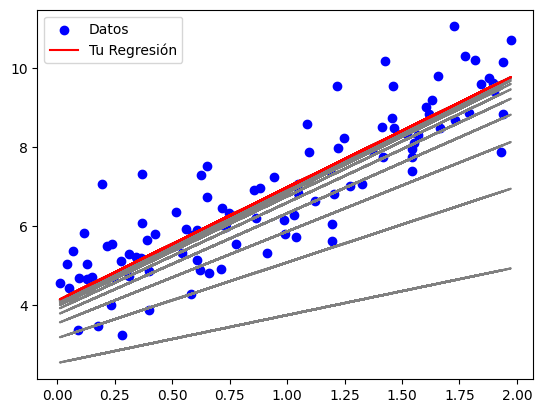

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=16, eta=0.1):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    
     #Generacion aleatoria de parametros (numpy)
    w = np.random.randn()
    b = np.random.randn()
    n = len(X_mock)

    for i in range(1, iteraciones):
        # calcular el error

        y_prima = w*X_mock + b

        error = y_mock - y_prima
        
        # Gradiente
        dw = (-2/n) *np.sum(error  * X_mock) # derivada de la pendiente
        db = (-2/n) *np.sum(error) # derivada del bias

        #Ajustar parametros
        w -= eta *dw 
        b -= eta *db

        #pintar recta
        pintar_recta(b,w,X_mock,y_mock)

    return b, w


def pintar_recta(b, w, X, y):
    plt.plot(X, b + w * X, color='gray')


# Probemos tu función
b, w = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado: {b}")
print(f"Pendiente estimada: {w}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b + w * X_mock, color='red', label='Tu Regresión')
plt.legend()
plt.show()

A la hora de comparara las métricas de forma manual respecto usando scikit-learn observammos ligeras diferencias entre los resultas obtenidos. 

Estas variaciones se debe a que numpy hace redondeos implícitos dentro de sus funciones mientras que scikit-learn optimiza sus operaciones numéricas de forma interna.

In [38]:
# predicciones manuales
y_pred_manual = w * X_mock + b

# Cálculo MSE manual
mse_manual = 1/(len(y_pred_manual)) * (np.sum((y_mock - y_pred_manual)**2))
print(f'MSE manual = {mse_manual}')

# Cálculo R2 manual
r2_manual = 1 - (np.sum((y_mock - y_pred_manual)**2)/(np.sum((y_mock - np.mean(y_mock))**2)))
print(f'R2 manual = {r2_manual}')

MSE manual = 0.8102111044971566
R2 manual = 0.768236156205544


In [39]:
# Predicciones con scikit-learn
lin_reg = LinearRegression().fit(X_mock, y_mock)
y_pred_sklearn = lin_reg.predict(X_mock)

mse = mean_squared_error(y_mock,y_pred_sklearn)
r2 = r2_score(y_mock,y_pred_sklearn)

print(f'MSE = {mse}')
print(f'R2 = {r2}')

MSE = 0.8065845639670531
R2 = 0.7692735413614223


## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

La serie se ha generado creando un rango de fechas comenzando el 01-01-2020, incluyendo una tendencia lineal que va de 10 a 50 en un periodo de 2 años. En cuanto a su estacionalidad, mediante el uso de la función del seno, se han simulado ciclos repetitivos de una amplotud de 10. Por úlrimo, el ruido se ha creado de forma aleatoria con una media en 0 y una desviación de 2.

Tras ello se ha hecho un resampleo para convertir la serie de diaria a mensual para suavizar el ruido.

En cuanto a la media móvil situada en 3 meses, permite suavizar la serie y visualizar mejor la tendencia. Es por ello, que cuanto más se aumente la ventana más plana será a tendencia, se perderá estacionalidad y el ruido sserá mayor.

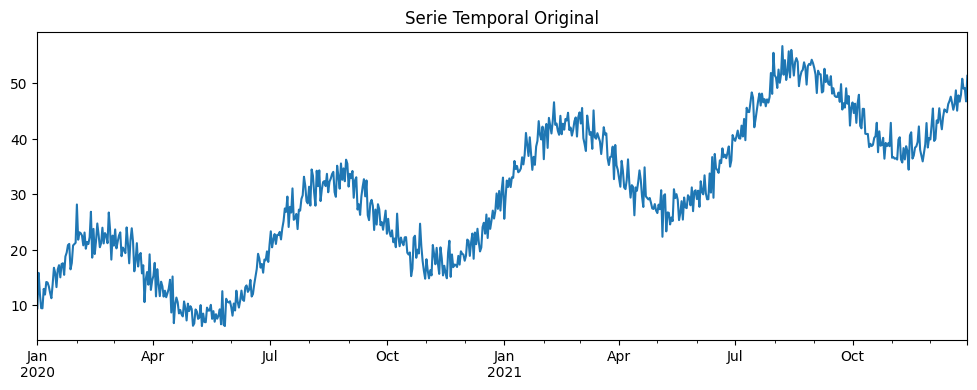

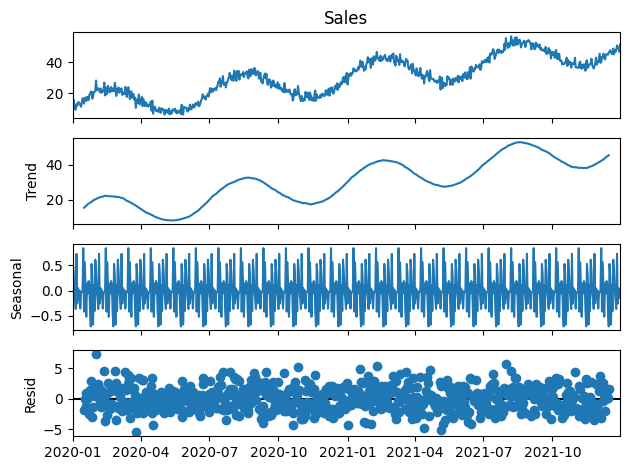

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# 0. Plot inicial
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12,4))
plt.show()

# 1. Convertir índice a DateTime
ts_df.index = pd.to_datetime(ts_df.index)

# 2. Resampleo Mensual
monthly_sales = ts_df.resample("ME").mean()

# 3. Media Móvil
ts_df['Moving_Avg'] = ts_df['Sales'].rolling(window = 3).mean()

# 4. Descomposición
result = seasonal_decompose(ts_df['Sales'], model='additive', period=30)
result.plot()
plt.show()


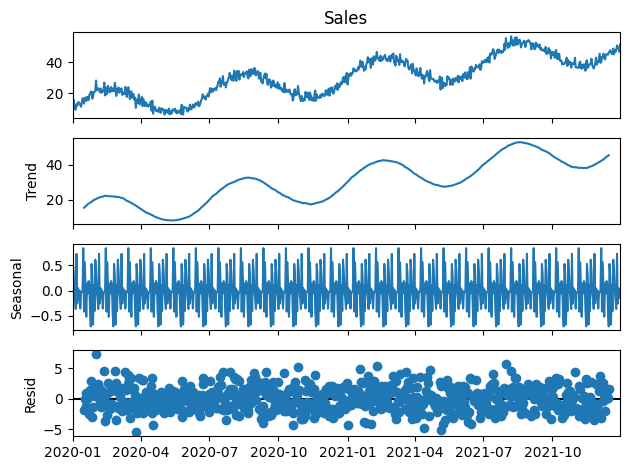

In [41]:
# Media Móvil -> aumentamos la ventana de 3 a 9
ts_df['Moving_Avg'] = ts_df['Sales'].rolling(window = 12).mean()

# Descomposición
result = seasonal_decompose(ts_df['Sales'], model='additive', period=30)
result.plot()
plt.show()

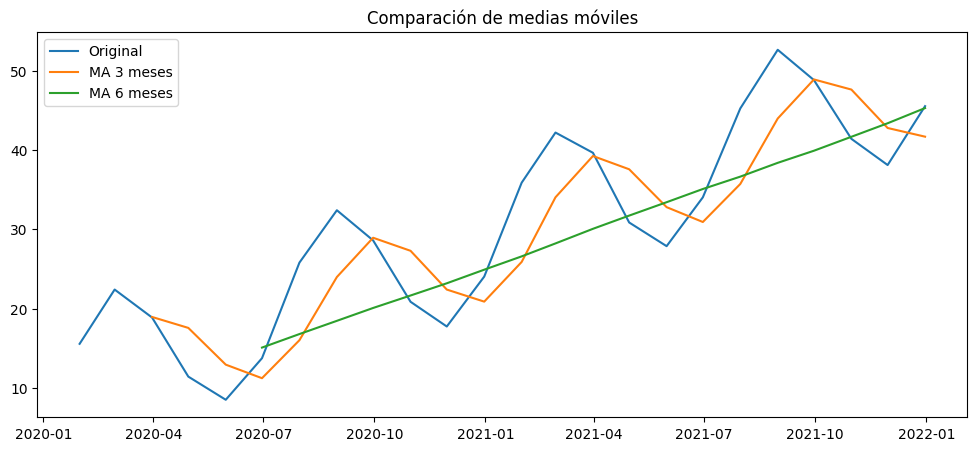

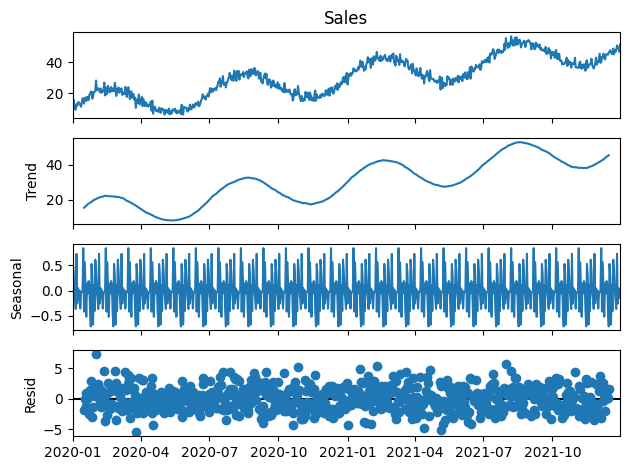

In [42]:
monthly_sales['MA3'] = monthly_sales['Sales'].rolling(window=3).mean()
monthly_sales['MA6'] = monthly_sales['Sales'].rolling(window=6).mean()

# Graficar comparación
plt.figure(figsize=(12,5))
plt.plot(monthly_sales['Sales'], label='Original')
plt.plot(monthly_sales['MA3'], label='MA 3 meses')
plt.plot(monthly_sales['MA6'], label='MA 6 meses')
plt.title('Comparación de medias móviles')
plt.legend()
plt.show()

# Descomposición con periodo anual (365 días)
result = seasonal_decompose(ts_df['Sales'], model='additive', period=30)
result.plot()
plt.show()